## Task 1

In [4]:
from matplotlib import pyplot as plt

In [5]:
import numpy as np

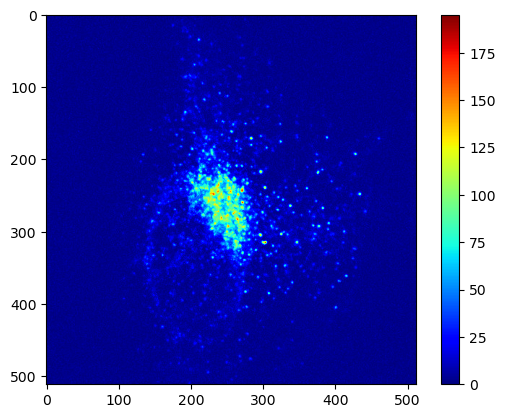

In [10]:
img_data = plt.imread('golgi-movie_robert_frame_01_gray.jpg')
plt.imshow(img_data, cmap='jet')
plt.colorbar()

## Task 2

type(img_data)=<class 'numpy.ndarray'>
img_data.shape=(512, 512)
img_data.min()=0
img_data.max()=195
img_data.sum()=1678097


Text(0.5, 1.0, 'Blue values')

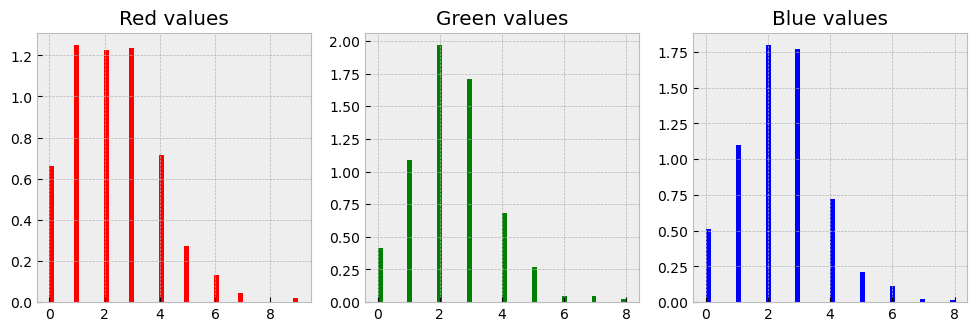

In [34]:
#Type of img_data.
print(f'{type(img_data)=}')

#Shape of img_data.
print(f'{img_data.shape=}')

#Values of maximum, minimum and sum of img_data.
print(f'{img_data.min()=}',
      f'{img_data.max()=}',
      f'{img_data.sum()=}',
      sep='\n')


#A histogram of all the values of img_data

plt.style.use('bmh')

# Convert the 2D array to a long 1D list using 'flatten'
r_data = img_data[:, 0].flatten()
g_data = img_data[:, 1].flatten()
b_data = img_data[:, 2].flatten()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5))
ax_red, ax_green, ax_blue = ax

ax_red.hist(r_data, color='red', bins=50, density=True)
ax_red.set_title('Red values')

ax_green.hist(g_data, color='green', bins=50, density=True)
ax_green.set_title('Green values')

ax_blue.hist(b_data, color='blue', bins=50, density=True)
ax_blue.set_title('Blue values')

From the results above,
1) Type of img_data: NumPy array <br> <br> 
2) Shape of img_data: a 2-Dimensional 512 x 512 array <br> <br> 
3) Values of maximum, minimum and sum of img_data:<br> 
The highest pixel intensity or data point present in the img_data array is 195. Higher values (closer to the maximum, e.g., 255 in an 8-bit image) represent brighter colors, with 255 being pure white. <br> 
The smallest pixel intensity or data point present in the img_data array is 0. Lower values (closer to 0) represent darker colors, with 0 being pure black. <br> 
The total of all pixel intensities or values in the img_data array adds up to 1678097.

## Task 3

In [2]:
import glob
from PIL import Image

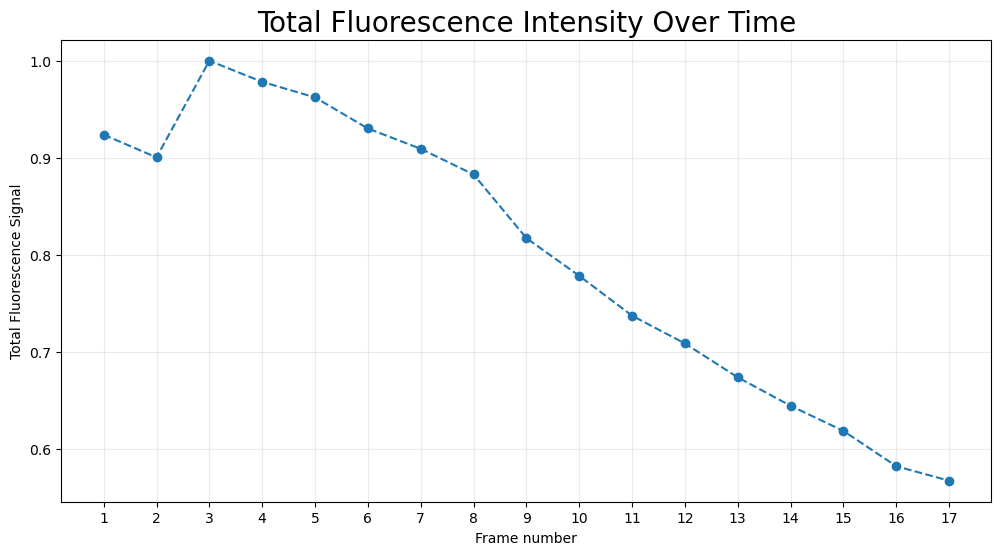

In [18]:
y_values = [] #create empty list to add in 17 values from the *sum of img_data* every time the loop iterates

for filename in glob.glob("*.jpg"):
    img_data = plt.imread(filename)
    total_intensity = img_data.sum()
    y_values.append(total_intensity)

    #print(f"{filename}, {y_values}")

x = range(1,18)
normalised_y = y_values / max(y_values)

plt.figure(figsize = (12, 6))
plt.plot(x, normalised_y, marker='o', linestyle='dashed')
plt.title('Total Fluorescence Intensity Over Time', size=20)
plt.grid(alpha = .25)
plt.xlabel('Frame number', size=10)
plt.xticks(x)
plt.ylabel('Total Fluorescence Signal', size=10)

plt.show()

## Task 4

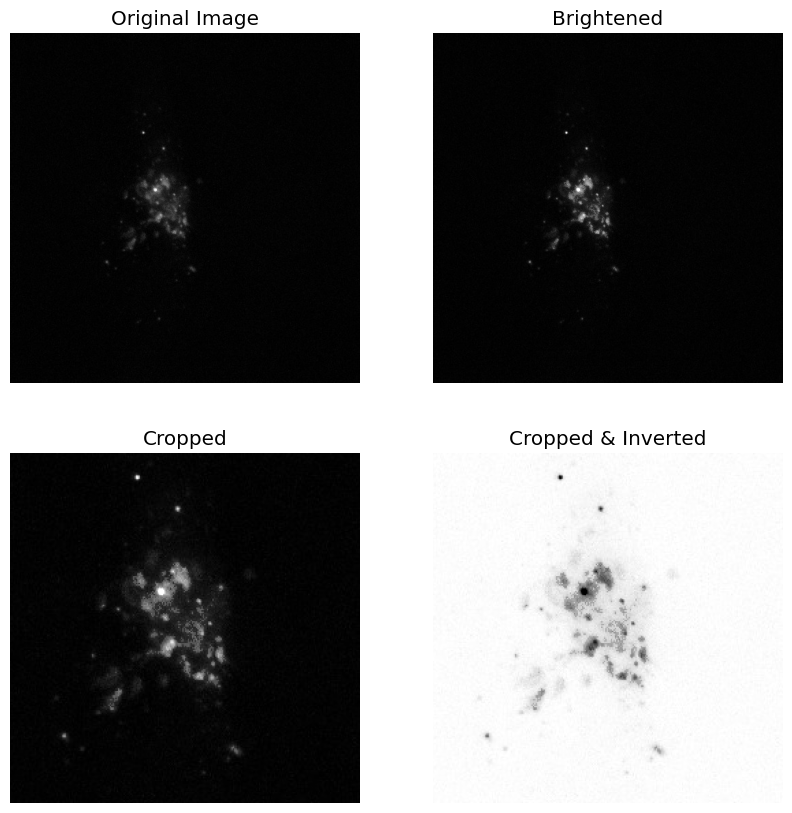

In [66]:
img_data = plt.imread('golgi-movie_robert_frame_17_gray.jpg')

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

#Top Left subplot: Original Image
ax[0, 0].set_title('Original Image')
ax[0, 0].imshow(img_data, cmap = 'gray')



#Top Right subplot: Brightened Image
brightened_image = np.where(img_data > 50, img_data * 1.5, img_data) #checks for pixels above 50 and multiplies them by 1.5, leaving the rest (ie. pixel value below 50) unchanged.

brightened_image = np.clip(brightened_image, 0, 255) #ensures that values don’t exceed 255 (the maximum for an 8-bit image).

brightened_image = brightened_image.astype(np.uint8) #Convert back to uint8 type, since image pixels are typically 8-bit integers

ax[0, 1].set_title('Brightened')
ax[0, 1].imshow(brightened_image, cmap='gray')



#Bottom Left subplot: Cropped Image

height, width = brightened_image.shape[:2]
left = int(width * 0.2)   # 20% from the left
right = int(width * 0.7)  # 70% from the left
top = int(height * 0.25)   # 25% from the top
bottom = int(height * 0.75)  # 75% from the top

cropped_data = brightened_image[top:bottom, left:right] # Crop the image

ax[1, 0].set_title('Cropped')
ax[1, 0].imshow(cropped_data, cmap='gray')



#Bottom Right subplot: Cropped & Inverted Image
inverted_data = 255 - cropped_data #subtract the maximum from the data so that bright becomes dark and dark becomes bright.

ax[1, 1].set_title('Cropped & Inverted')
ax[1, 1].imshow(inverted_data, cmap='gray')



for a in ax.flatten():
    a.axis('off')

## Task 5

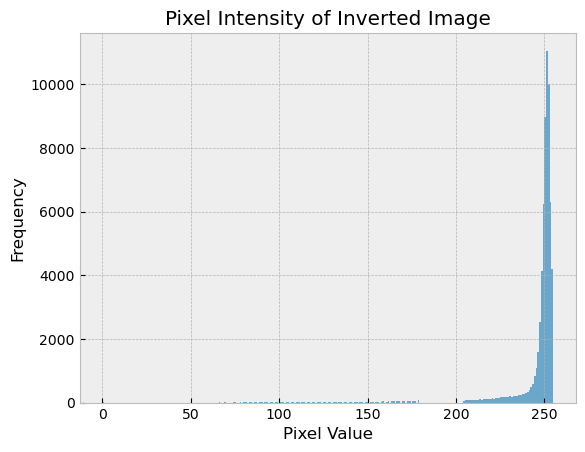

In [72]:
#Plot the histogram for the data corresponding to the inverted image from the previous task.

plt.style.use('bmh')

flattened_data = inverted_data.flatten()

# Plot the histogram
plt.hist(flattened_data, bins=256, range=(0, 255), alpha=0.7)
plt.title('Pixel Intensity of Inverted Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

**Why are there no negative numbers?** <br>
In an image, pixel values are typically represented as unsigned integers, which means they can only be non-negative. The pixel values in an 8-bit grayscale image range from 0 to 255, where 0 represents black (the darkest pixel value), and 255 represents white (the brightest pixel value). <br>

**Results of inverting the image:** <br>
When we invert the image by subtracting each pixel value from the maximum (255), the lowest pixel value (which is 0) becomes 255, and the highest pixel value (which is 255) becomes 0. Since the subtraction never produces a value below 0, there are no negative pixel intensities in the inverted image. <br>

**For example:** <br>
If the original pixel value was 200, the inverted value becomes 255 - 200 = 55. <br>
If the original pixel value was 0 (pure black), the inverted value becomes 255 - 0 = 255. <br>
If the original pixel value was 255 (pure white), the inverted value becomes 255 - 255 = 0. <br>